
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)
    
X = np.random.randn(200, 3)
w = np.array([2.0, -1.5, 0.5])
b = 3.0
    
y = X @ w + b + np.random.randn(200) * 0.5

In [3]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        X = np.array(X, dtype = float)
        self.average = X.mean(axis = 0)
        self.standard_deviation = X.std(axis = 0)
        return self
    
    def transform(self, X):
        X = np.array(X, dtype = float)
        return (X - self.average)/self.standard_deviation
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [4]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []
    
    def fit_gradient_descent(self, X, y):
        X = np.array(X, dtype = float)
        y = np.array(y, dtype = float)
        n,d = X.shape

        # Adding a column of ones for the addition of a constant bias
        X = np.hstack((np.ones((n,1)), X))

        self.w = np.zeros(d+1)
        self.losses = []

        for i in range(self.epochs):
            y_pred = X @ self.w
            error = y_pred - y
            loss = np.mean(error**2)
            self.losses.append(loss)
            grad = (2/n)*(X.T @ error)
            self.w -= self.lr*grad
            
        return self

    def fit_L2(self, X, y):
        X = np.array(X, dtype = float)
        y = np.array(y, dtype = float)

        n, d = X.shape

        # Adding a column of ones for the addition of a constant bias
        X = np.hstack((np.ones((n,1)), X))
        
        self.w = np.zeros(d+1)

        for i in range(self.epochs):
            y_pred = X @ self.w
            error = y_pred - y
            loss = np.mean(error**2)
            self.losses.append(loss)
            grad = (2/n)*(X.T @ error)

            # Adding the L2 regularization
            grad[1:] += 2*self.l2_lambda*self.w[1:]

            self.w -= self.lr*grad 
        
        return self

    def predict(self, X):
        X = np.array(X, dtype=float)
        n = X.shape[0]
        X = np.hstack((np.ones((n, 1)), X))
        return X @ self.w


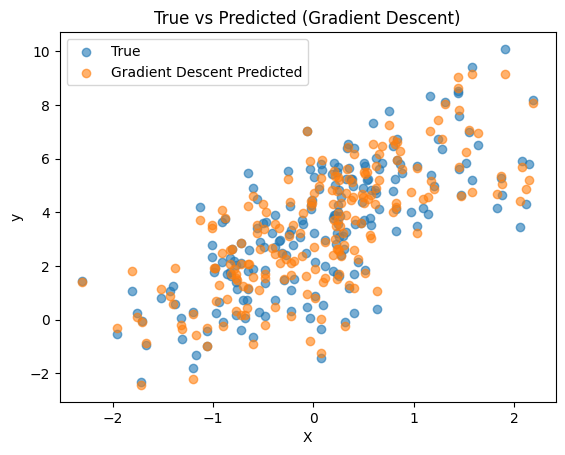

In [5]:
# Implementing Gradient Descent without L2 regularisation and plotting the required plots
gd_model = LinearRegressionManual(lr=0.05, epochs=1000)
gd_model.fit_gradient_descent(X_scaled, y)
y_pred_gd = gd_model.predict(X_scaled)

# Plotting (true vs predicted) values for Gradient Descent only
plt.figure()
plt.scatter(X[:, 0], y, alpha=0.6, label="True")
plt.scatter(X[:, 0], y_pred_gd, alpha=0.6, label="Gradient Descent Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("True vs Predicted (Gradient Descent)")
plt.show()

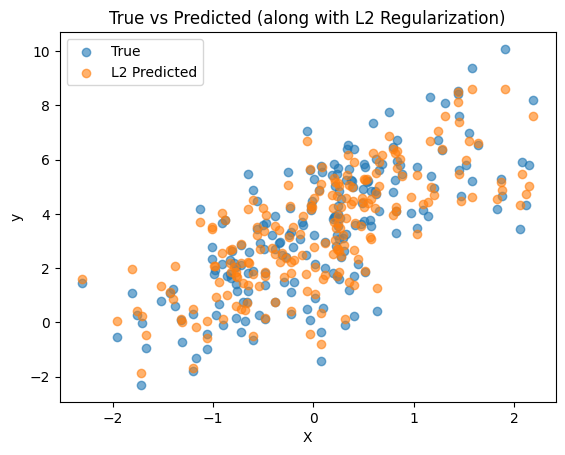

In [6]:
# Implementing Gradient Descent with L2 regualarisation
l2_model = LinearRegressionManual(lr=0.05, epochs=1000, l2_lambda=0.1)
l2_model.fit_L2(X_scaled, y)
y_pred_l2 = l2_model.predict(X_scaled)

# Plotting (True vs Predicted) values for Gradient Descent along with L2 Regularisation
plt.figure()
plt.scatter(X[:, 0], y, alpha=0.6, label="True")
plt.scatter(X[:, 0], y_pred_l2, alpha=0.6, label="L2 Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("True vs Predicted (along with L2 Regularization)")
plt.show()


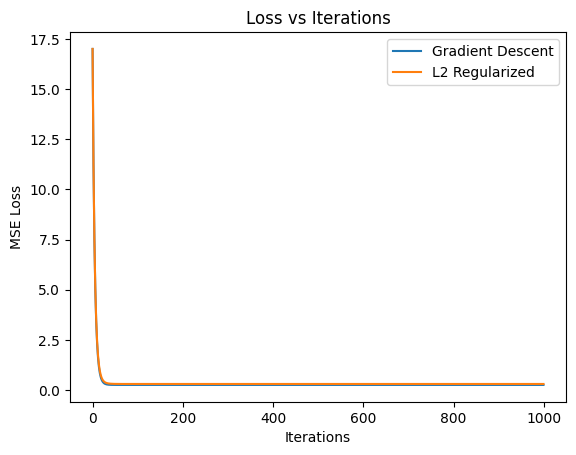

In [7]:
# Plotting Loss vs Iterations for Gradient Descent and L2

plt.figure()
plt.plot(gd_model.losses, label="Gradient Descent")
plt.plot(l2_model.losses, label="L2 Regularized")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss vs Iterations")
plt.legend()
plt.show()
# The dataset we used made the algorithm to work almost as same for both with and without L2 Regularisation



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [8]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    z = np.clip(z, -500, 500) # For treating very large or very less values 
    return (1/(1+np.exp(-z)))


In [9]:
# Generating a binary classification dataset
np.random.seed(42)

X_binary = np.random.randn(200, 2)
y_binary = (X_binary[:, 0] + 2 * X_binary[:, 1] > 2).astype(int)

mask = np.random.rand(200) < 0.7
y_binary[mask] = 0

In [10]:
scaler_binary = StandardScalerManual()
X_binary_scaled = scaler.fit_transform(X_binary)

In [11]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []
    
    def sigmoid(self, z):
        z = np.clip(z, -500, 500) # For treating very large or very less values 
        return (1/(1+np.exp(-z)))

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)

        n, d = X.shape

        # add bias
        X = np.hstack((np.ones((n, 1)), X))
        self.w = np.zeros(d + 1)
        self.losses = []

        for i in range(self.epochs):
            z = X @ self.w
            y_hat = self.sigmoid(z)

            # Binary Cross-Entropy loss
            loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

            # L2 regularisation
            loss += self.l2_lambda * np.sum(self.w[1:] ** 2)
            self.losses.append(loss)

            # Gradient
            grad = (1 / n) * (X.T @ (y_hat - y))
            grad[1:] += 2 * self.l2_lambda * self.w[1:]

            # Updation
            self.w -= self.lr * grad

        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        n = X.shape[0]
        X = np.hstack((np.ones((n, 1)), X))
        return self.sigmoid(X @ self.w)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


In [12]:
model = LogisticRegressionManual(lr=0.05, epochs=2000, l2_lambda=0.1)
model.fit(X_binary_scaled, y_binary)


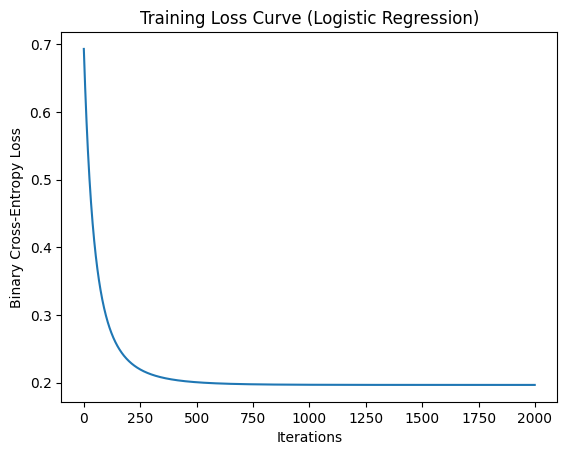

In [13]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve (Logistic Regression)")
plt.show()


In [14]:
y_pred = model.predict(X_binary_scaled)
accuracy = np.mean(y_pred == y_binary)
print(f"Final Training Accuracy: {accuracy:.4f}")

Final Training Accuracy: 0.9450



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [15]:
from sklearn.cluster import KMeans

# Implement K-Means for matrix elements
# CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    M = np.array(M)
    m, n = M.shape
    X = M.reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    assignment_table = labels.reshape(m, n)

    cookbook = {i: [] for i in range(k)}
    for i in range(m):
        for j in range(n):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    centroids = kmeans.cluster_centers_.flatten()

    return assignment_table, cookbook, centroids


[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]]
Centroids: [0.84609194 0.05946125 0.52044191]
Assignment table:
 [[2 0 2 2 2]
 [2 2 0 0 2]
 [0 2 2 0 1]
 [1 1 0 0 0]]
Cookbook:
Cluster 0: [(0, 1), (1, 2), (1, 3), (2, 0), (2, 3), (3, 2), (3, 3), (3, 4)]
Cluster 1: [(2, 4), (3, 0), (3, 1)]
Cluster 2: [(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 4), (2, 1), (2, 2)]


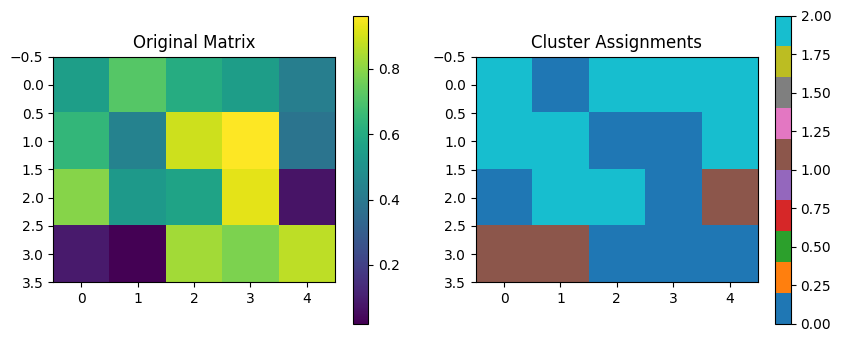

In [16]:
# Implementing it on a randomly generated matrix of dimensions (4,5)
np.random.seed(0)
M = np.random.rand(4, 5)

assignment_table, cookbook, centroids = kmeans_matrix(M, k=3)

print(M)
print("Centroids:", centroids)
print("Assignment table:\n", assignment_table)
print("Cookbook:")
for c in cookbook:
    print(f"Cluster {c}: {cookbook[c]}")

# Plotting the matrix before and after K-Means clustering    
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(M, cmap="viridis")
plt.colorbar()
plt.title("Original Matrix")

plt.subplot(1, 2, 2)
plt.imshow(assignment_table, cmap="tab10")
plt.colorbar()
plt.title("Cluster Assignments")

plt.show()





## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.


In [17]:
np.random.seed(42)

# Features with vastly different scales for understanding importance of scaling
x1 = np.random.randn(300)              
x2 = 1000 * np.random.randn(300)       
x3 = 100000 * np.random.randn(300)      

X_raw = np.column_stack((x1, x2, x3))

# True weights
true_w = np.array([3.0, -0.002, 0.000001])
constant = 5.0

# Linear target with noise
y = X_raw @ true_w + constant + np.random.randn(300) * 5


In [18]:
model_raw = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model_raw.fit_L2(X_raw, y)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_raw)

model_scaled = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model_scaled.fit_L2(X_scaled, y)

C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_21060\462448896.py:46: RuntimeWarning: overflow encountered in square
  loss = np.mean(error**2)
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_21060\462448896.py:48: RuntimeWarning: overflow encountered in matmul
  grad = (2/n)*(X.T @ error)
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_21060\462448896.py:48: RuntimeWarning: invalid value encountered in matmul
  grad = (2/n)*(X.T @ error)


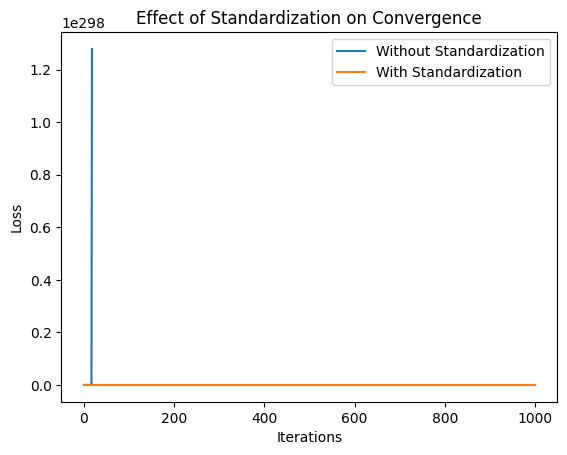

In [19]:
# Plotting thec convergence comparison betweent he raw and the scaled 
plt.figure()
plt.plot(model_raw.losses, label="Without Standardization")
plt.plot(model_scaled.losses, label="With Standardization")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of Standardization on Convergence")
plt.legend()
plt.show()


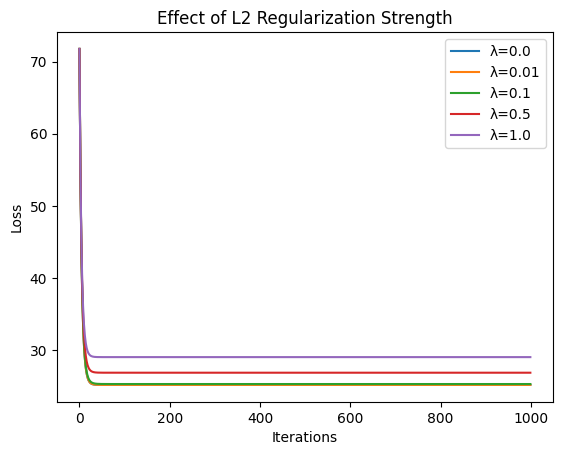

In [20]:
lambdas = [0.0, 0.01, 0.1, 0.5, 1.0]

plt.figure()
for lam in lambdas:
    model = LinearRegressionManual(lr=0.05, epochs=1000, l2_lambda=lam)
    model.fit_L2(X_scaled, y)
    plt.plot(model.losses, label=f"λ={lam}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of L2 Regularization Strength")
plt.legend()
plt.show()
